# INSTALL DEPENDENCY

In [1]:
!pip install mlxtend

In [2]:
!pip install researchpy

In [3]:
!pip install yellowbrick

In [4]:
!pip install lightgbm

In [5]:
!pip install category_encoders


# THE CONFIG

In [6]:
import platform

print('Version      :', platform.python_version())
print('Compiler     :', platform.python_compiler())
print('Normal       :', platform.platform())


Version      : 3.7.9
Compiler     : GCC 9.3.0
Normal       : Linux-4.19.0-14-cloud-amd64-x86_64-with-debian-10.8


# IMPORT LIBRARIES

In [7]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif, f_oneway, chi2
from sklearn.feature_selection import RFECV as RFECV_SKLEARN
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from yellowbrick.features import RFECV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score
import itertools
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
from scipy import stats
import researchpy as rp
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# READING CSV

In [269]:
url = 'https://drive.google.com/file/d/1kEw7vRKERlKz0E7Qy325DW0sPDiLfNwk/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
rain_data_aus = pd.read_csv(path)

In [9]:
url = 'https://drive.google.com/file/d/1pV6RVUpobOgmCAsiCrVenNio8ei3BkbY/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
wind_table_01 = pd.read_csv(path)

In [10]:
url = 'https://drive.google.com/file/d/1KhOYw1KLDWfxd71oCF71bzqZ4KH2Wtw8/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
wind_table_02 = pd.read_csv(path)

In [11]:
url = 'https://drive.google.com/file/d/1D9da0AUTmh2JW84XaQvptRlKSriZ77TO/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
wind_table_03 = pd.read_csv(path)

In [12]:
url = 'https://drive.google.com/file/d/1f9MJaMCMFUU0KGXmLODM4hRgkp5m9BTh/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
wind_table_04 = pd.read_csv(path)

In [13]:
url = 'https://drive.google.com/file/d/1peItzyGis2dztdJjrqxmZUT9rVFdOFaU/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
wind_table_05 = pd.read_csv(path)

In [14]:
url = 'https://drive.google.com/file/d/1pVi1rfghOZwkXIpMLj9WFbjy9UgmlsNy/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
wind_table_06 = pd.read_csv(path)

In [15]:
url = 'https://drive.google.com/file/d/1dC6y2pgHZZlhZksawifHVxWJx4uNk58R/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
wind_table_07 = pd.read_csv(path)

In [16]:
url = 'https://drive.google.com/file/d/1jlXAUwUOKS0AzV7Auyz5gtqJrR3xCrmY/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
wind_table_08 = pd.read_csv(path)

# DISPLAY

In [17]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# EXPLORATORY ANALYSIS

In [266]:
rain_data_aus.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164


In [19]:
rain_data_aus.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm', 'precipitation9am', 'modelo_vigente'], dtype='object')

In [20]:
rain_data_aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              142193 non-null  object 
 1   location          142193 non-null  object 
 2   mintemp           141556 non-null  float64
 3   maxtemp           141871 non-null  float64
 4   rainfall          140787 non-null  float64
 5   evaporation       81350 non-null   float64
 6   sunshine          74377 non-null   float64
 7   humidity9am       140419 non-null  float64
 8   humidity3pm       138583 non-null  float64
 9   pressure9am       128179 non-null  float64
 10  pressure3pm       128212 non-null  float64
 11  cloud9am          88536 non-null   float64
 12  cloud3pm          85099 non-null   float64
 13  temp9am           141289 non-null  float64
 14  temp3pm           139467 non-null  float64
 15  raintoday         140787 non-null  object 
 16  amountOfRain      14

In [21]:
rain_data_aus.isnull().sum()

date                    0
location                0
mintemp               637
maxtemp               322
rainfall             1406
evaporation         60843
sunshine            67816
humidity9am          1774
humidity3pm          3610
pressure9am         14014
pressure3pm         13981
cloud9am            53657
cloud3pm            57094
temp9am               904
temp3pm              2726
raintoday            1406
amountOfRain            0
raintomorrow            0
temp                  322
humidity             3610
precipitation3pm        0
precipitation9am        0
modelo_vigente          0
dtype: int64

<AxesSubplot:>

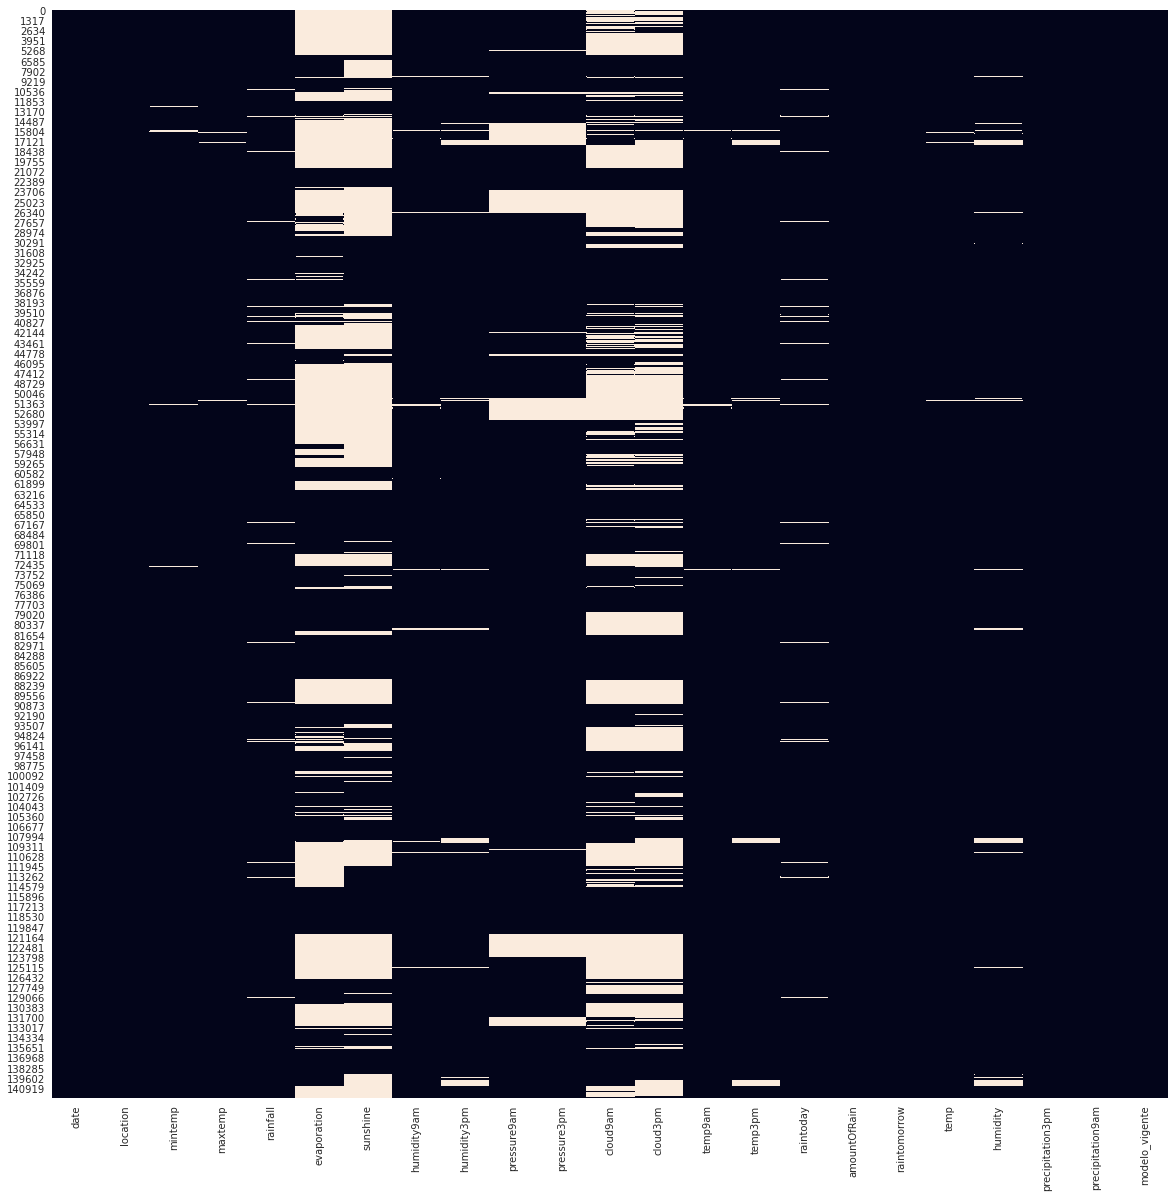

In [267]:
sns.set({'figure.figsize':(20,20)})
sns.heatmap(rain_data_aus.isnull(),cbar=False)

In [23]:
rain_data_aus.describe()

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,amountOfRain,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,141871.000000,138583.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682,28.505419,61.991179,10.014164,10.000748,0.227804
std,6.403283,7.117618,8.465173,4.188537,3.781525,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969,10.237506,26.649111,3.169832,4.997908,0.272764
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,-3.760000,2.000000,0.000000,-17.739346,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,22.520000,44.000000,8.000000,6.650238,0.030055
50%,12.000000,22.600000,0.000000,4.800000,8.500000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,28.520000,63.200000,10.000000,10.000009,0.100853
75%,16.800000,28.200000,0.800000,7.400000,10.600000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000,35.480000,80.000000,12.000000,13.389306,0.329507
max,33.900000,48.100000,371.000000,145.000000,14.500000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,59.720000,122.000000,26.000000,32.478590,0.999400


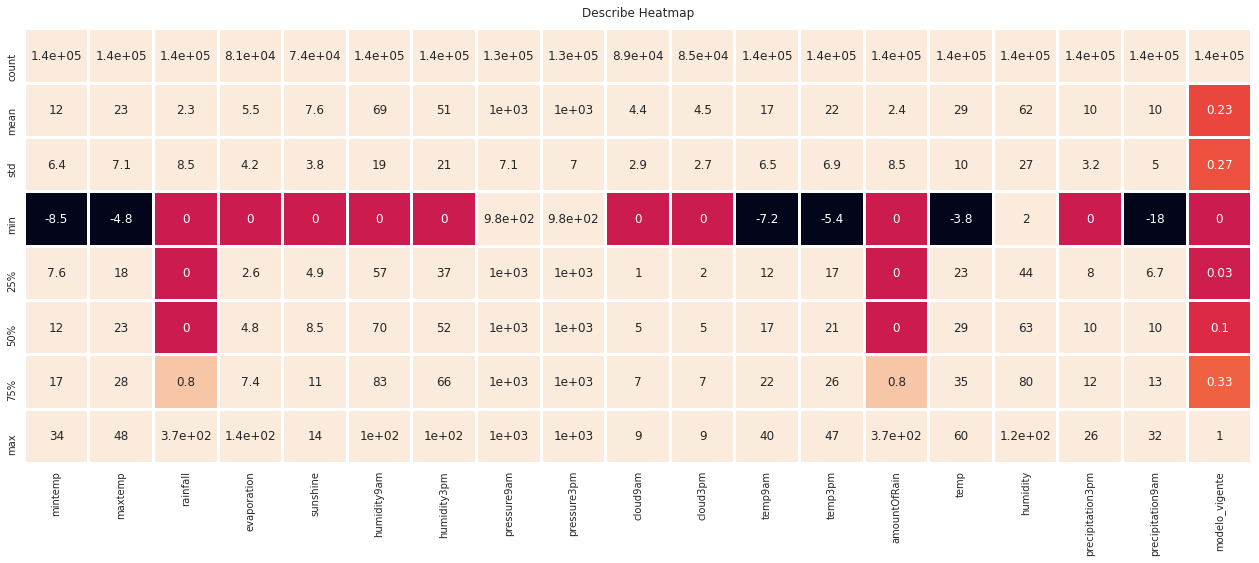

In [24]:
# Increase the size of the heatmap.
plt.figure(figsize=(22, 8))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
describe = sns.heatmap(rain_data_aus.describe(), vmin=-1, vmax=1, annot=True,linewidths=2,cbar=False)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
describe.set_title('Describe Heatmap', fontdict={'fontsize':12}, pad=12);

In [25]:
rain_data_aus.location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cobar               2988
Cairns              2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
NorfolkIsland       2964
Penrith             2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


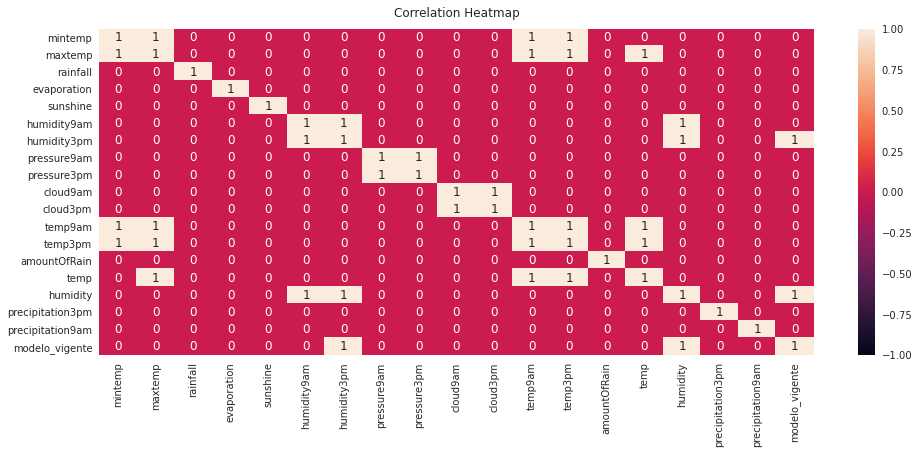

In [268]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(rain_data_aus.corr()>0.6, vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

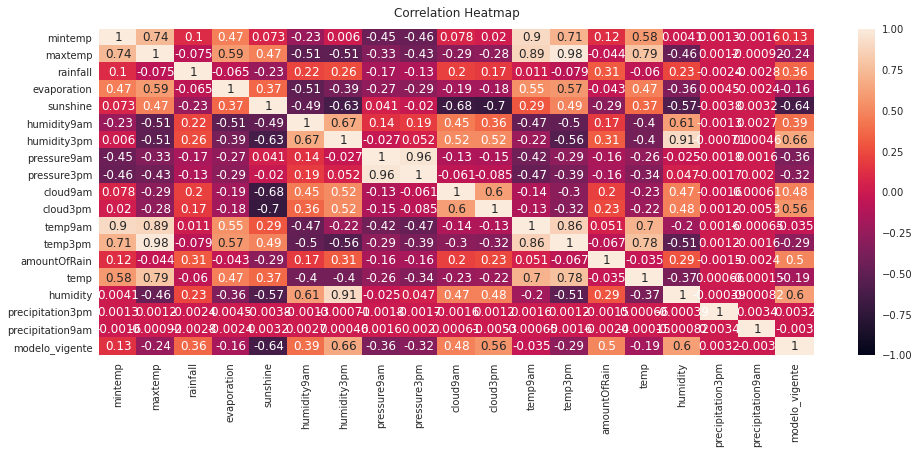

In [270]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(rain_data_aus.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 365)'>

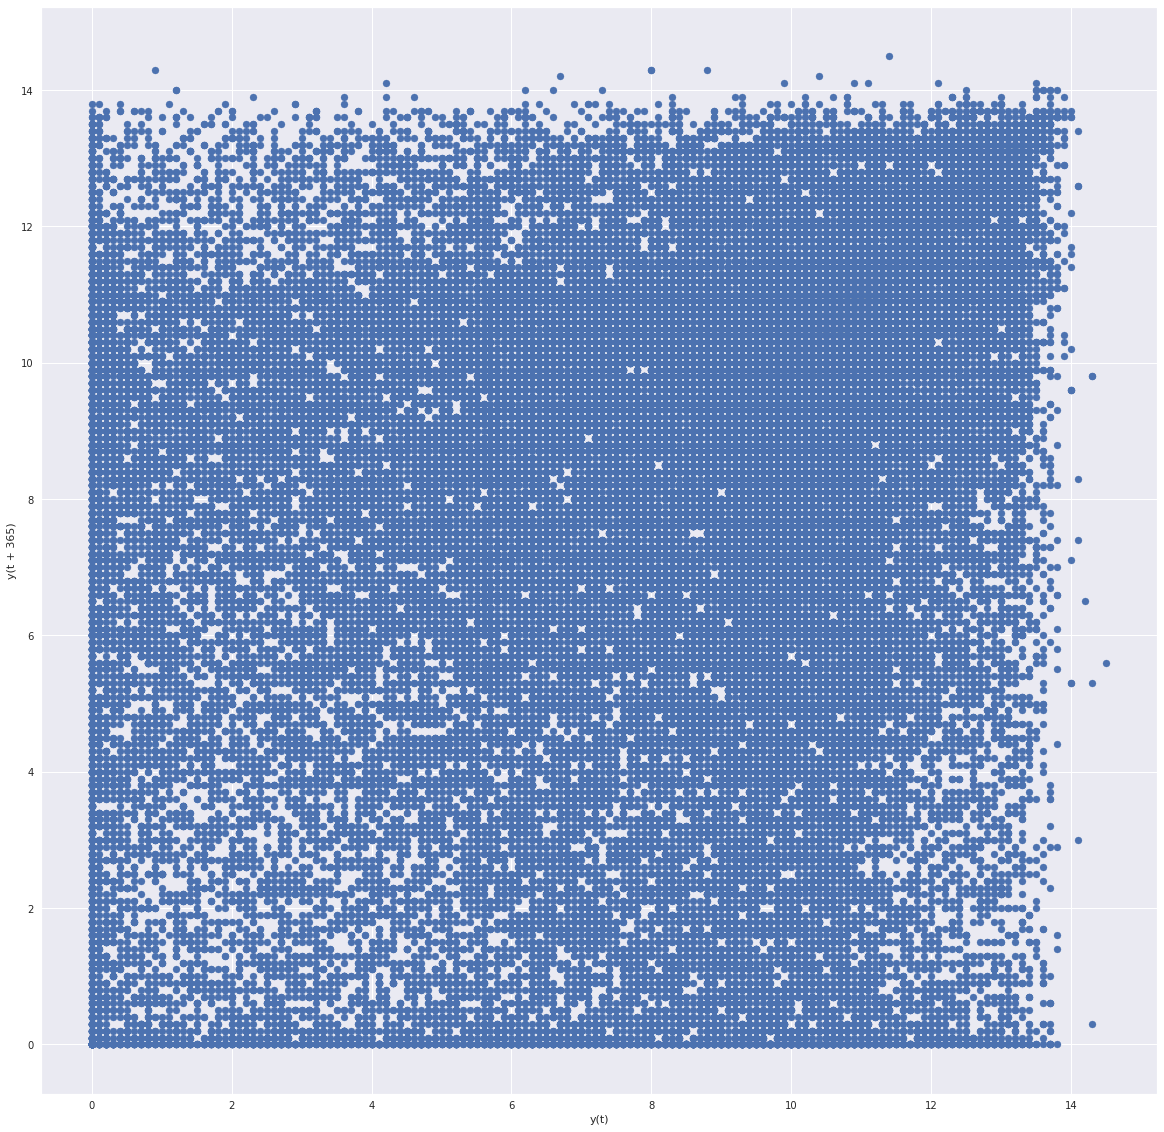

In [28]:
pd.plotting.lag_plot(rain_data_aus['sunshine'], lag = 365)


In [29]:
rain_data_aus.location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cobar               2988
Cairns              2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
NorfolkIsland       2964
Penrith             2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


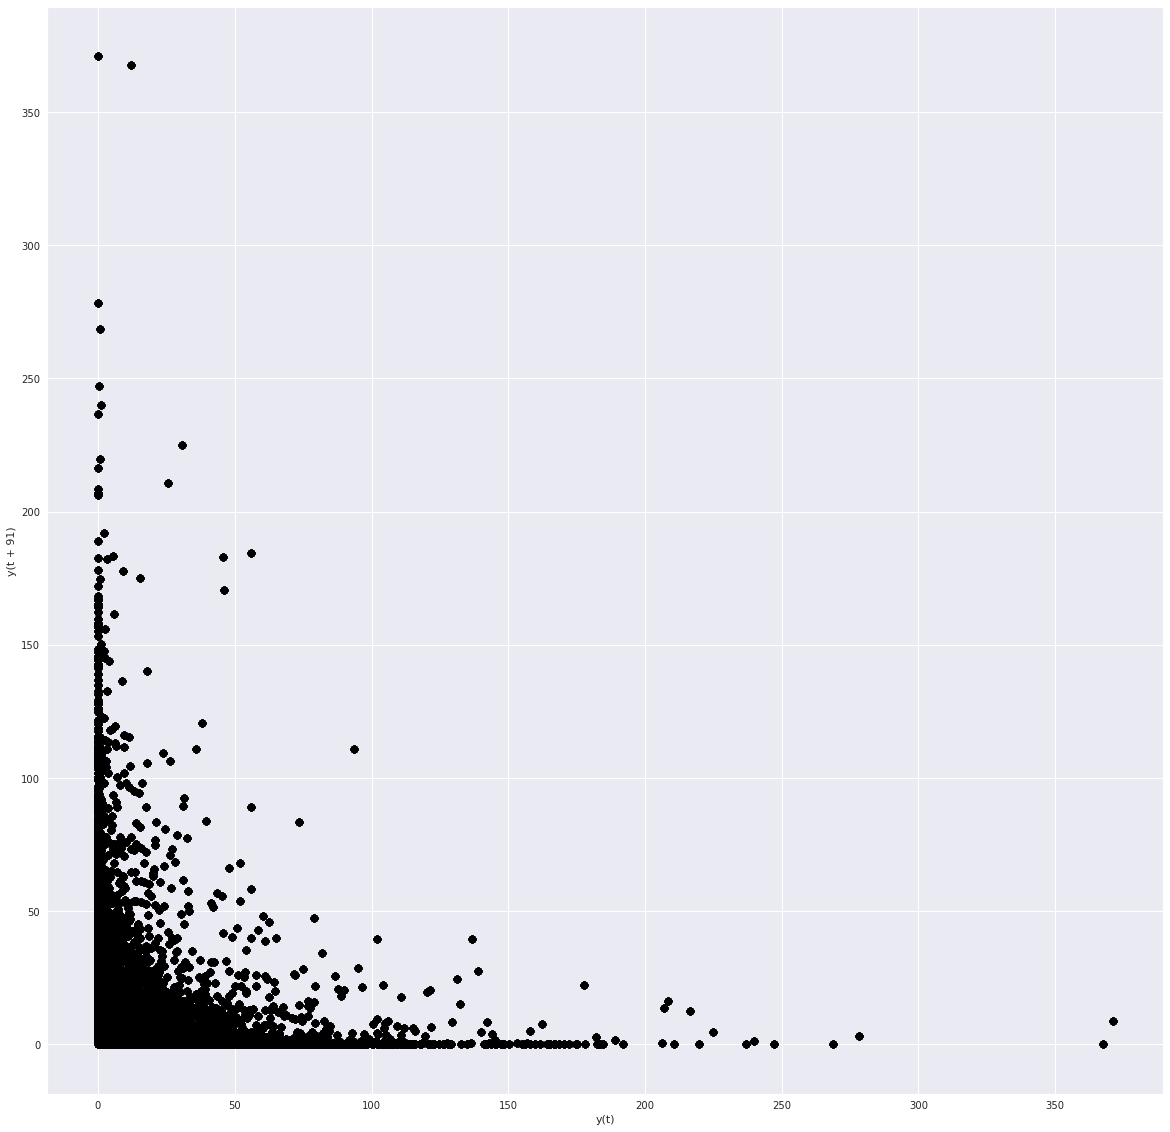

In [30]:
for city in rain_data_aus.location.value_counts():
    pd.plotting.lag_plot(rain_data_aus['rainfall'], lag = 91,c='black')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 91)'>

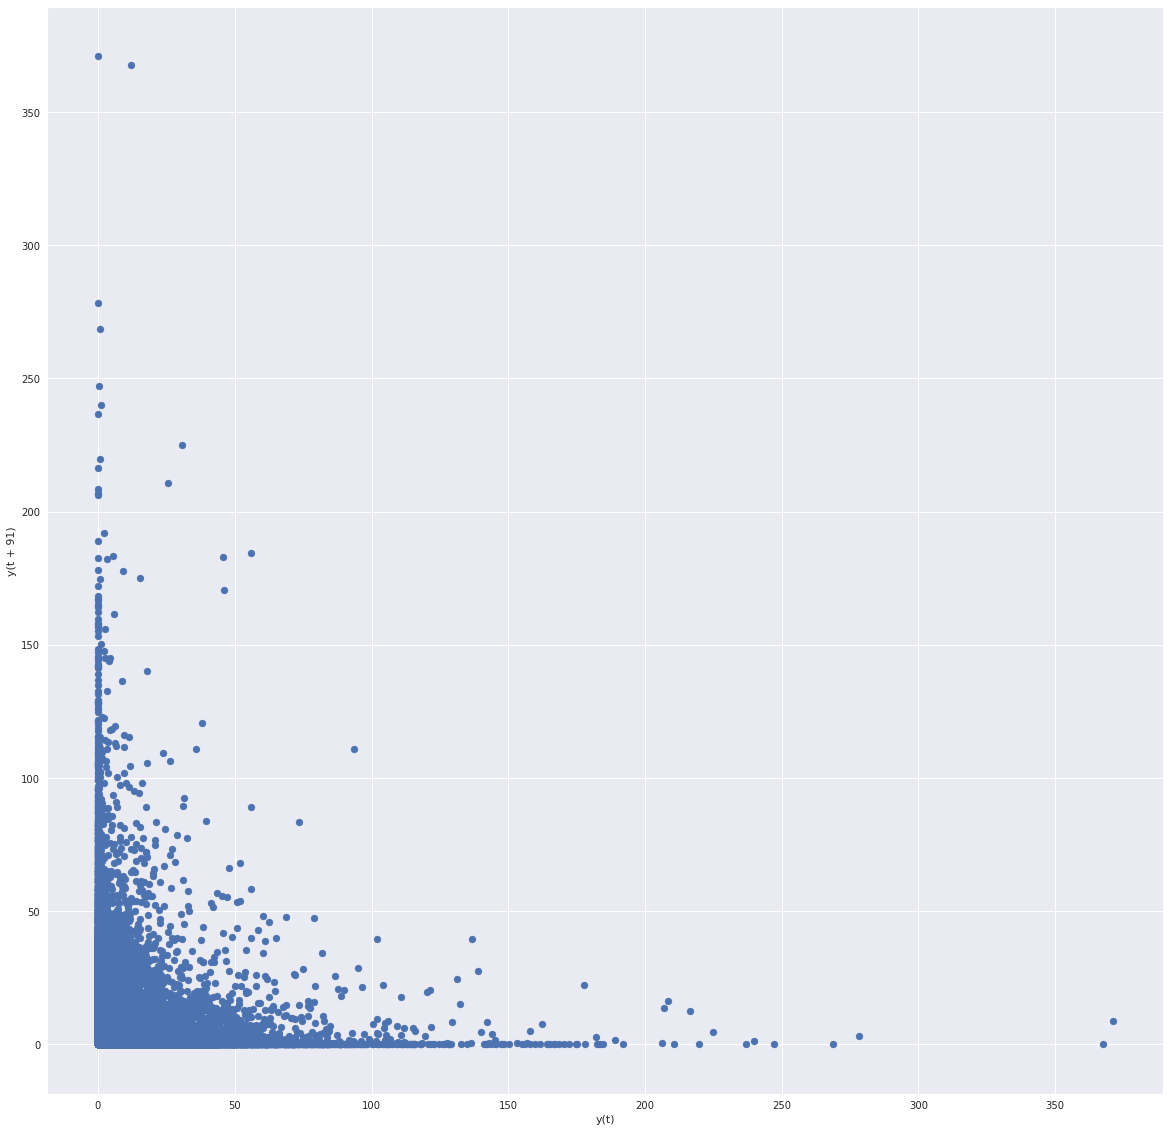

In [31]:
pd.plotting.lag_plot(rain_data_aus['rainfall'], lag = 91)
pd.plotting.lag_plot(rain_data_aus['sunshine'], lag = 91)
pd.plotting.lag_plot(rain_data_aus['evaporation'], lag = 91)

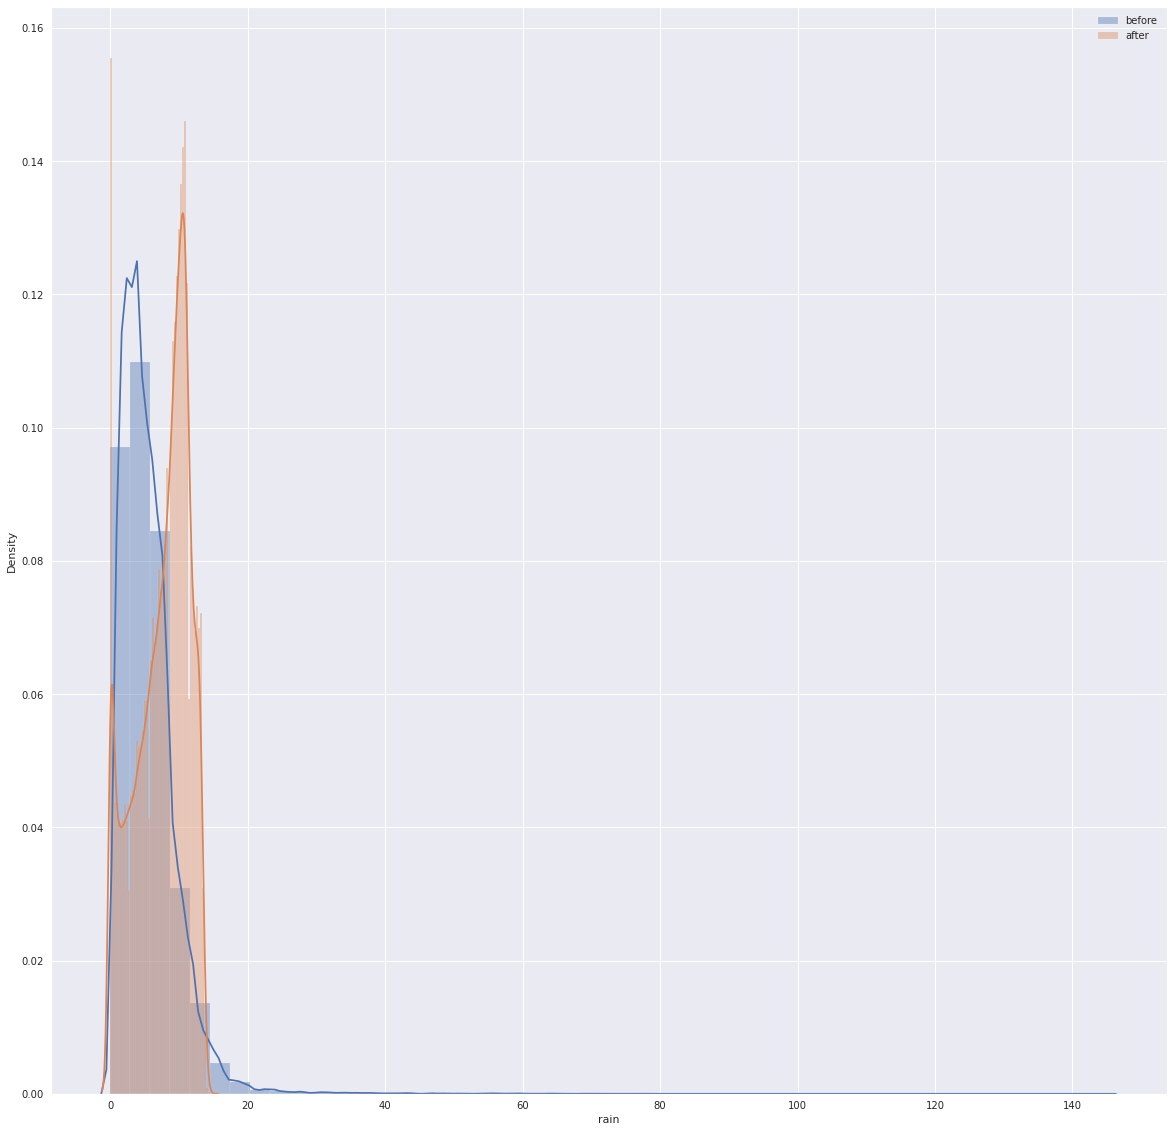

In [32]:
sns.distplot(rain_data_aus.evaporation, label='before')
sns.distplot(rain_data_aus.sunshine, label='after')
plt.xlabel('rain')
plt.legend();

In [264]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(rain_data_aus.corr()[['raintomorrow']], vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Model', fontdict={'fontsize':18}, pad=16);

KeyError: "None of [Index(['raintomorrow'], dtype='object')] are in the [columns]"

<Figure size 576x864 with 0 Axes>

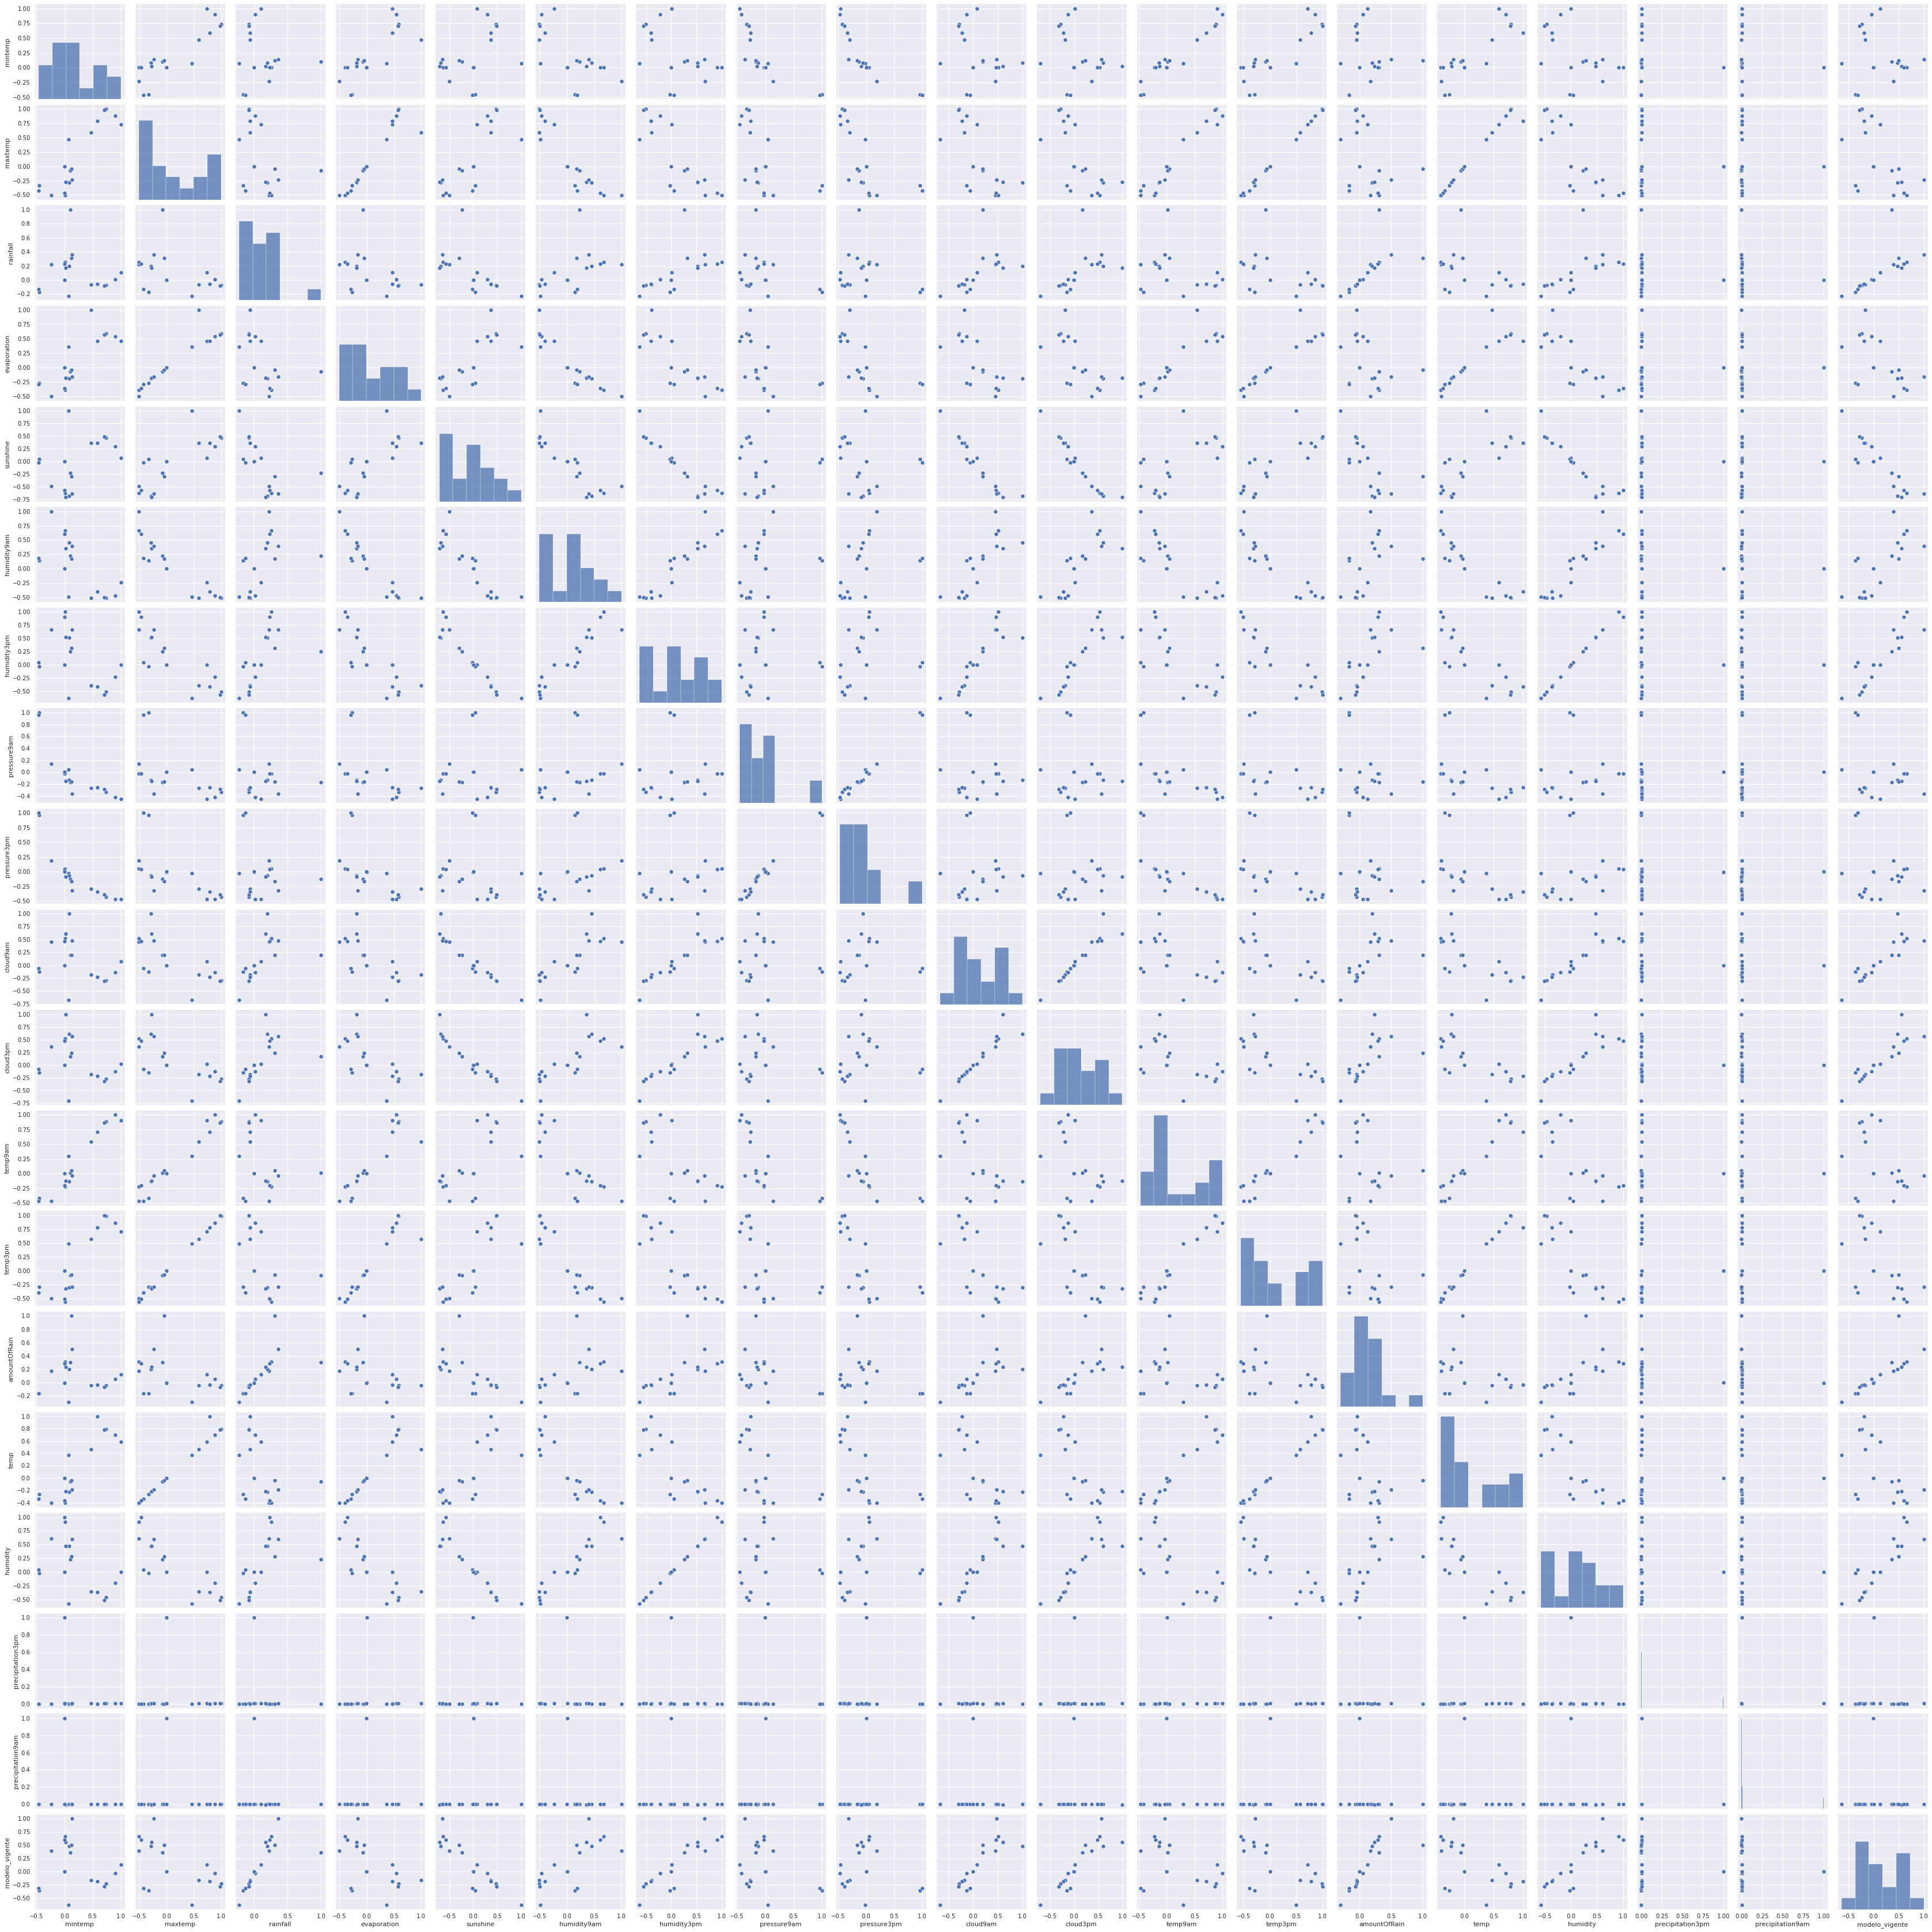

In [34]:
sns.pairplot(rain_data_aus.corr())

In [35]:
sns.pairplot(rain_data_aus)

Error in callback <function flush_figures at 0x7f679dbdd290> (for post_execute):


KeyboardInterrupt: 

# selecting X and Y

In [133]:
rain_data_aus.dtypes

date                 object
location             object
mintemp             float64
maxtemp             float64
rainfall            float64
evaporation         float64
sunshine            float64
humidity9am         float64
humidity3pm         float64
pressure9am         float64
pressure3pm         float64
cloud9am            float64
cloud3pm            float64
temp9am             float64
temp3pm             float64
raintoday            object
amountOfRain        float64
raintomorrow         object
temp                float64
humidity            float64
precipitation3pm      int64
precipitation9am    float64
modelo_vigente      float64
dtype: object

In [277]:
rain_data_aus['raintoday'].value_counts()

No     109332
Yes     31455
Name: raintoday, dtype: int64

In [289]:
rain_data_aus['raintoday']=rain_data_aus['raintoday'].apply(lambda x: x=='Yes')

In [290]:
X=rain_data_aus.drop(columns=['amountOfRain','date','location','raintomorrow','modelo_vigente',])

In [291]:
y=rain_data_aus['raintomorrow']

In [292]:
y=rain_data_aus['raintomorrow'].apply(lambda x: x=='Yes')

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [296]:
X

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,temp,humidity,precipitation3pm,precipitation9am
0,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,False,29.48,28.400000,12,5.115360
1,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,False,32.12,2.208569,10,21.497100
2,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,False,32.84,38.000000,17,20.782859
3,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,False,35.60,21.200000,8,12.028646
4,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,40.76,41.600000,9,11.883546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,NaN,NaN,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,False,28.16,34.400000,12,5.848681
142189,2.8,23.4,0.0,NaN,NaN,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,False,30.08,30.800000,10,6.653879
142190,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,False,32.36,27.200000,9,19.715976
142191,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,False,34.28,30.800000,12,0.985551


In [ ]:
# BALANCEAMENTO 

# STRATIFY

# UNDERSAMPLING

#VÁRIOS METODOS 

#ENTENDER DO SEU NEGÓCIO PARA PODER ESPICIFICAR A SUA LÓGICA 

#DOS CUSTOS DOS ERROS 
#MANIPULAÇÃO DE TRESHOLD

# NULLS

In [297]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)

SimpleImputer()

In [298]:
X_train=imputer.transform(X_train)
X_test=imputer.transform(X_test)

In [299]:
scaler = StandardScaler()

In [300]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [301]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

# Modelo 

In [302]:
from lightgbm import LGBMClassifier

model_log = LogisticRegression()
          
model_lgbm = LGBMClassifier()

In [303]:
X_train=pd.DataFrame(X_train)

# number of clusters by COTOVELO

In [307]:
#plt.plot(range(1,10), inertia, '-o')
#plt.xlabel('n_clusters')
#plt.ylabel('Inertia (Distortion)')

# clustering

In [308]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [309]:
kmeans = KMeans(3)

kmeans.fit(X_train)

kmeans.predict(X_train)

array([1, 1, 0, ..., 2, 1, 2], dtype=int32)

In [310]:
cluster_test=kmeans.predict(X_test)

# veja o que deu de errado

In [172]:
from sklearn.cluster import KMeans

plt.scatter(X_train.humidity, y_train, s=40, c=kmeans.labels_,cmap='viridis');

AttributeError: 'DataFrame' object has no attribute 'humidity'

In [169]:
from sklearn.cluster import KMeans

plt.scatter(X_train.temp, y_train, s=40, c=kmeans.labels_,cmap='viridis');

AttributeError: 'DataFrame' object has no attribute 'temp'

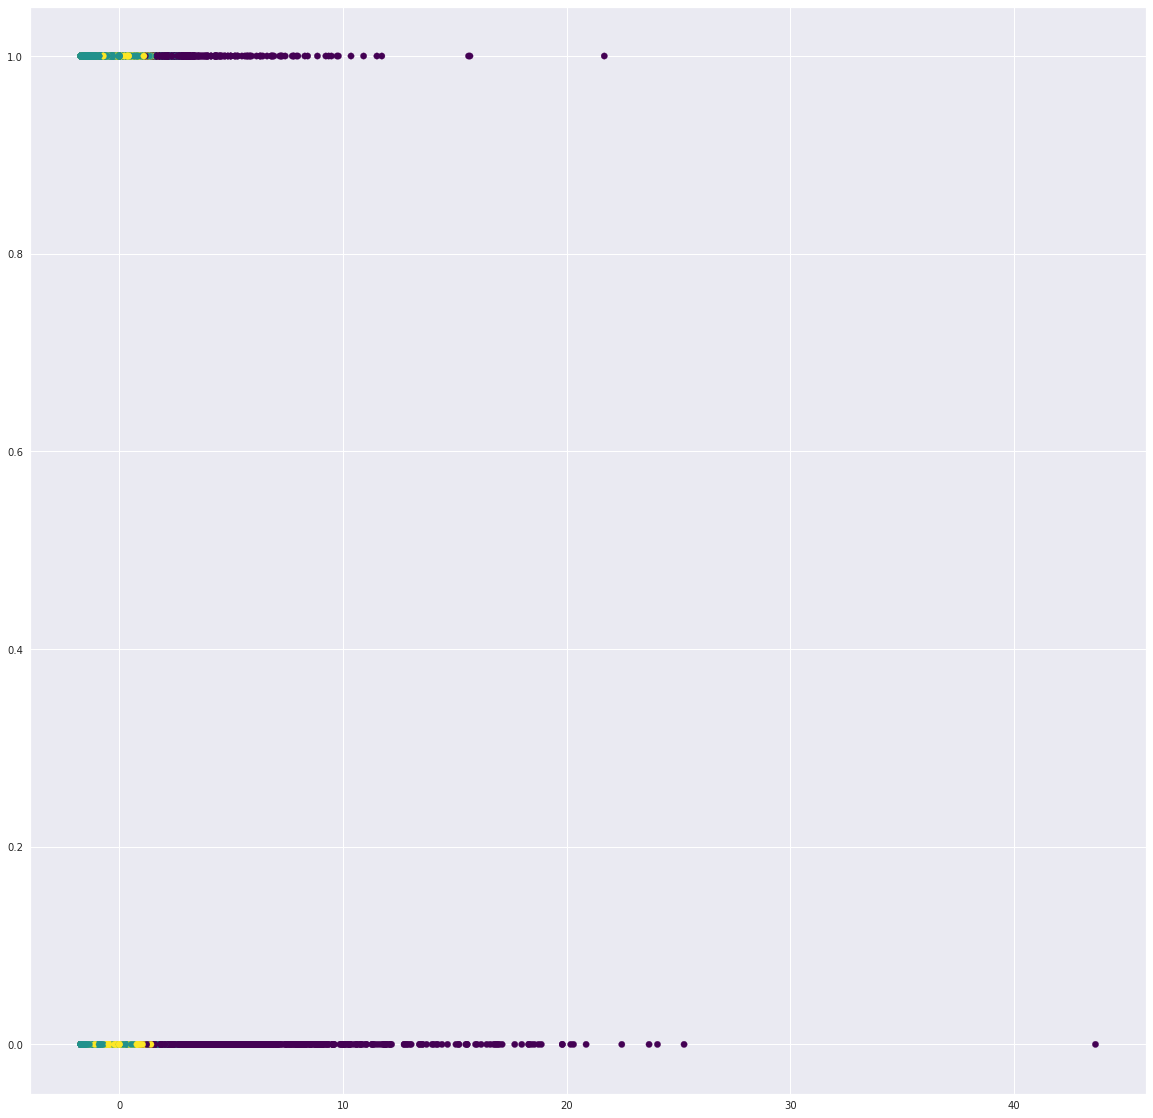

In [73]:
from sklearn.cluster import KMeans

plt.scatter(X_train.evaporation, y_train, s=40, c=kmeans.labels_,cmap='viridis');

# modeling pipeline

In [382]:
from lightgbm import LGBMClassifier

model_lgbm = LGBMClassifier(
objective= 'binary',
max_depth= 7,
num_leaves= 60,
n_estimators=50)

In [346]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(C=0.1)

In [347]:
import sklearn
sklearn.set_config(display='diagram')

In [348]:
model_0 = LogisticRegression()
model_1 = LogisticRegression()
model_2 = LogisticRegression()

model_0.fit(X_train, y_train)
model_1.fit(X_train[kmeans.labels_==1], y_train[kmeans.labels_==1])
model_2.fit(X_train[kmeans.labels_==2], y_train[kmeans.labels_==2])

LogisticRegression()

In [349]:
from sklearn.metrics import roc_auc_score, recall_score,precision_score,confusion_matrix

In [316]:
X_test=scaler.transform(X_test)

In [317]:
X_test=imputer.transform(X_test)

In [318]:
confusion_matrix(y_test,model_0.predict(X_test))

array([[    0, 22098],
       [    0,  6341]])

In [319]:
confusion_matrix(y_test[cluster_test==1],model_1.predict(X_test[cluster_test==1]))

array([[   0, 3384],
       [   0, 3808]])

In [320]:
confusion_matrix(y_test[cluster_test==2],model_2.predict(X_test[cluster_test==2]))

array([[   0, 9090],
       [   0, 1143]])

# test do treino regressão logística clusterizada

In [333]:
confusion_matrix(y_train[kmeans.labels_==2],model_2.predict(X_train[kmeans.labels_==2]))

array([[36194,   319],
       [ 4057,   352]])

In [334]:
confusion_matrix(y_train[kmeans.labels_==0],model_0.predict(X_train[kmeans.labels_==0]))

array([[38326,   302],
       [ 5023,   360]])

In [335]:
confusion_matrix(y_train[kmeans.labels_==1],model_1.predict(X_train[kmeans.labels_==1]))

array([[ 8793,  4284],
       [ 4332, 11412]])

# LGBM

In [383]:
model_lgbm.fit(X_train,y_train)

LGBMClassifier(max_depth=7, n_estimators=50, num_leaves=60, objective='binary')

In [384]:
confusion_matrix(y_test,model_lgbm.predict(X_test))

array([[22098,     0],
       [ 6341,     0]])

# Decision Tree

In [337]:
from sklearn.tree import DecisionTreeClassifier

In [338]:
tree = DecisionTreeClassifier(max_depth=5, criterion='gini')
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [340]:
recall_score(y_test,tree.predict(X_test))

0.12253587762182622

In [342]:
recall_score(y_train,tree.predict(X_train))

0.4483082706766917

In [343]:
confusion_matrix(y_train,tree.predict(X_train))

array([[83768,  4450],
       [14088, 11448]])

In [344]:
confusion_matrix(y_test,tree.predict(X_test))

array([[21622,   476],
       [ 5564,   777]])